In [130]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mpimg
from numpy import array
%matplotlib inline

In [173]:
# build filter bank convolution kernels
def build_filters():
    filters = []
    ksize = 31
    PI = np.pi
    kernel_params = []
    results = []
    for theta in np.arange(0, np.pi, np.pi / 16):
        kern = cv2.getGaborKernel((ksize, ksize), 4.0, theta, 10.0, 0.5, 0, ktype=cv2.CV_32F)
        #ksize = 11
        #theta = m*PI/8
        #lambd = 16/3
        #sigma = (5.09030 * 8.0) / (3.0 * PI)
        #gamma = 0.5890
        #psi = 1
        #kern = cv2.getGaborKernel(ksize = (ksize,ksize), sigma = sigma, 
        #        theta= theta, lambd = lambd, 
        #                        gamma = gamma, psi = psi)
        kern /= 1.5*kern.sum()

        params = 'theta=%d,\nksize=%d' % (theta * 180 / np.pi, ksize)
        kernel_params.append(params)
        filters.append(kern)

    return filters
 
#Filtering of images here
def process(img, filters):
    accum = np.zeros_like(img)
    all_filtered = []
    #print(img.shape)
    #print(accum.shape)
    kern_max = np.zeros_like(filters[0])
    for kern in filters:
        fimg = cv2.filter2D(img, cv2.CV_8UC3, kern)
        # returning all the filtered images here
        all_filtered.append((fimg,kern))
        # find maximum element wise and accumulate it in accum
        accum_temp = np.maximum(accum, fimg)
        #print(accum_temp[0][0])
        #print(accum[0][0])
        #print(np.not_equal(accum_temp,accum))
        if np.not_equal(accum_temp,accum).any():
        #print('switching now')
            kern_max = kern
            accum = accum_temp
        #plt.imshow(kern_max)
        #plt.show()
    #print('FINAL')
    #plt.imshow(kern_max)
    #plt.show()
    return (accum, kern_max)
 
    
    


In [174]:
def process_by_filter(imgs, filter):
    all_filtered = [] # filter followed by the images
    all_filtered.append(filter)
 
    for im in imgs:
        fimg = cv2.filter2D(im, cv2.CV_8UC3, filter)
        all_filtered.append(fimg)
        
    return all_filtered

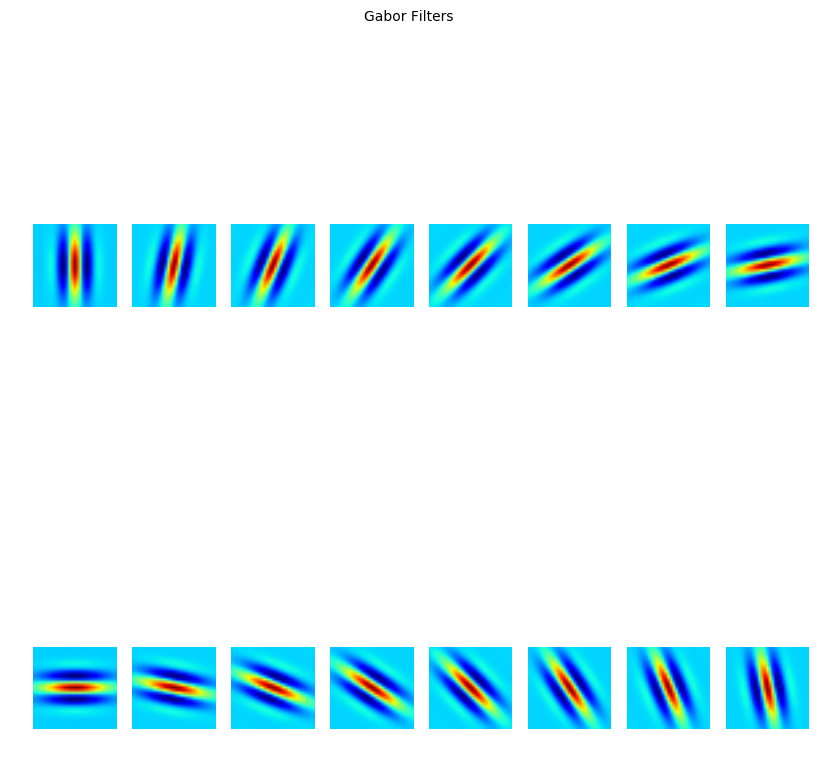

In [183]:
img_1 = cv2.imread('H4.tiff')
img_2 = cv2.imread('H20.tiff')
img_3 = cv2.imread('I65.tiff')
img_4 = cv2.imread('I200.tiff')

image_names = ('H4', 'H20', 'I65', 'I200')

images = (img_1, img_2, img_3, img_4)

#img = cv2.imread(img_fn)
 
filters = build_filters()

flen = len(filters)

fig_fil, axes_fil = plt.subplots(nrows=2, ncols=flen/2 ,figsize=(10, 10))
#axes_fil[0][0].axis('off')

fig_fil.suptitle('Gabor Filters', fontsize=10)

for i, image1 in enumerate(filters):
    axes_fil.flat[i].imshow(image1)
    axes_fil.flat[i].axis('off')

In [176]:
#process by filter
f_imgs = []
for f in filters:
    f_imgs.append(process_by_filter(images,f))
    

In [165]:
results = []
#f_img = process(img_4, filters)
for i in images:
    fimg = process(i, filters)
    
    results.append(fimg)

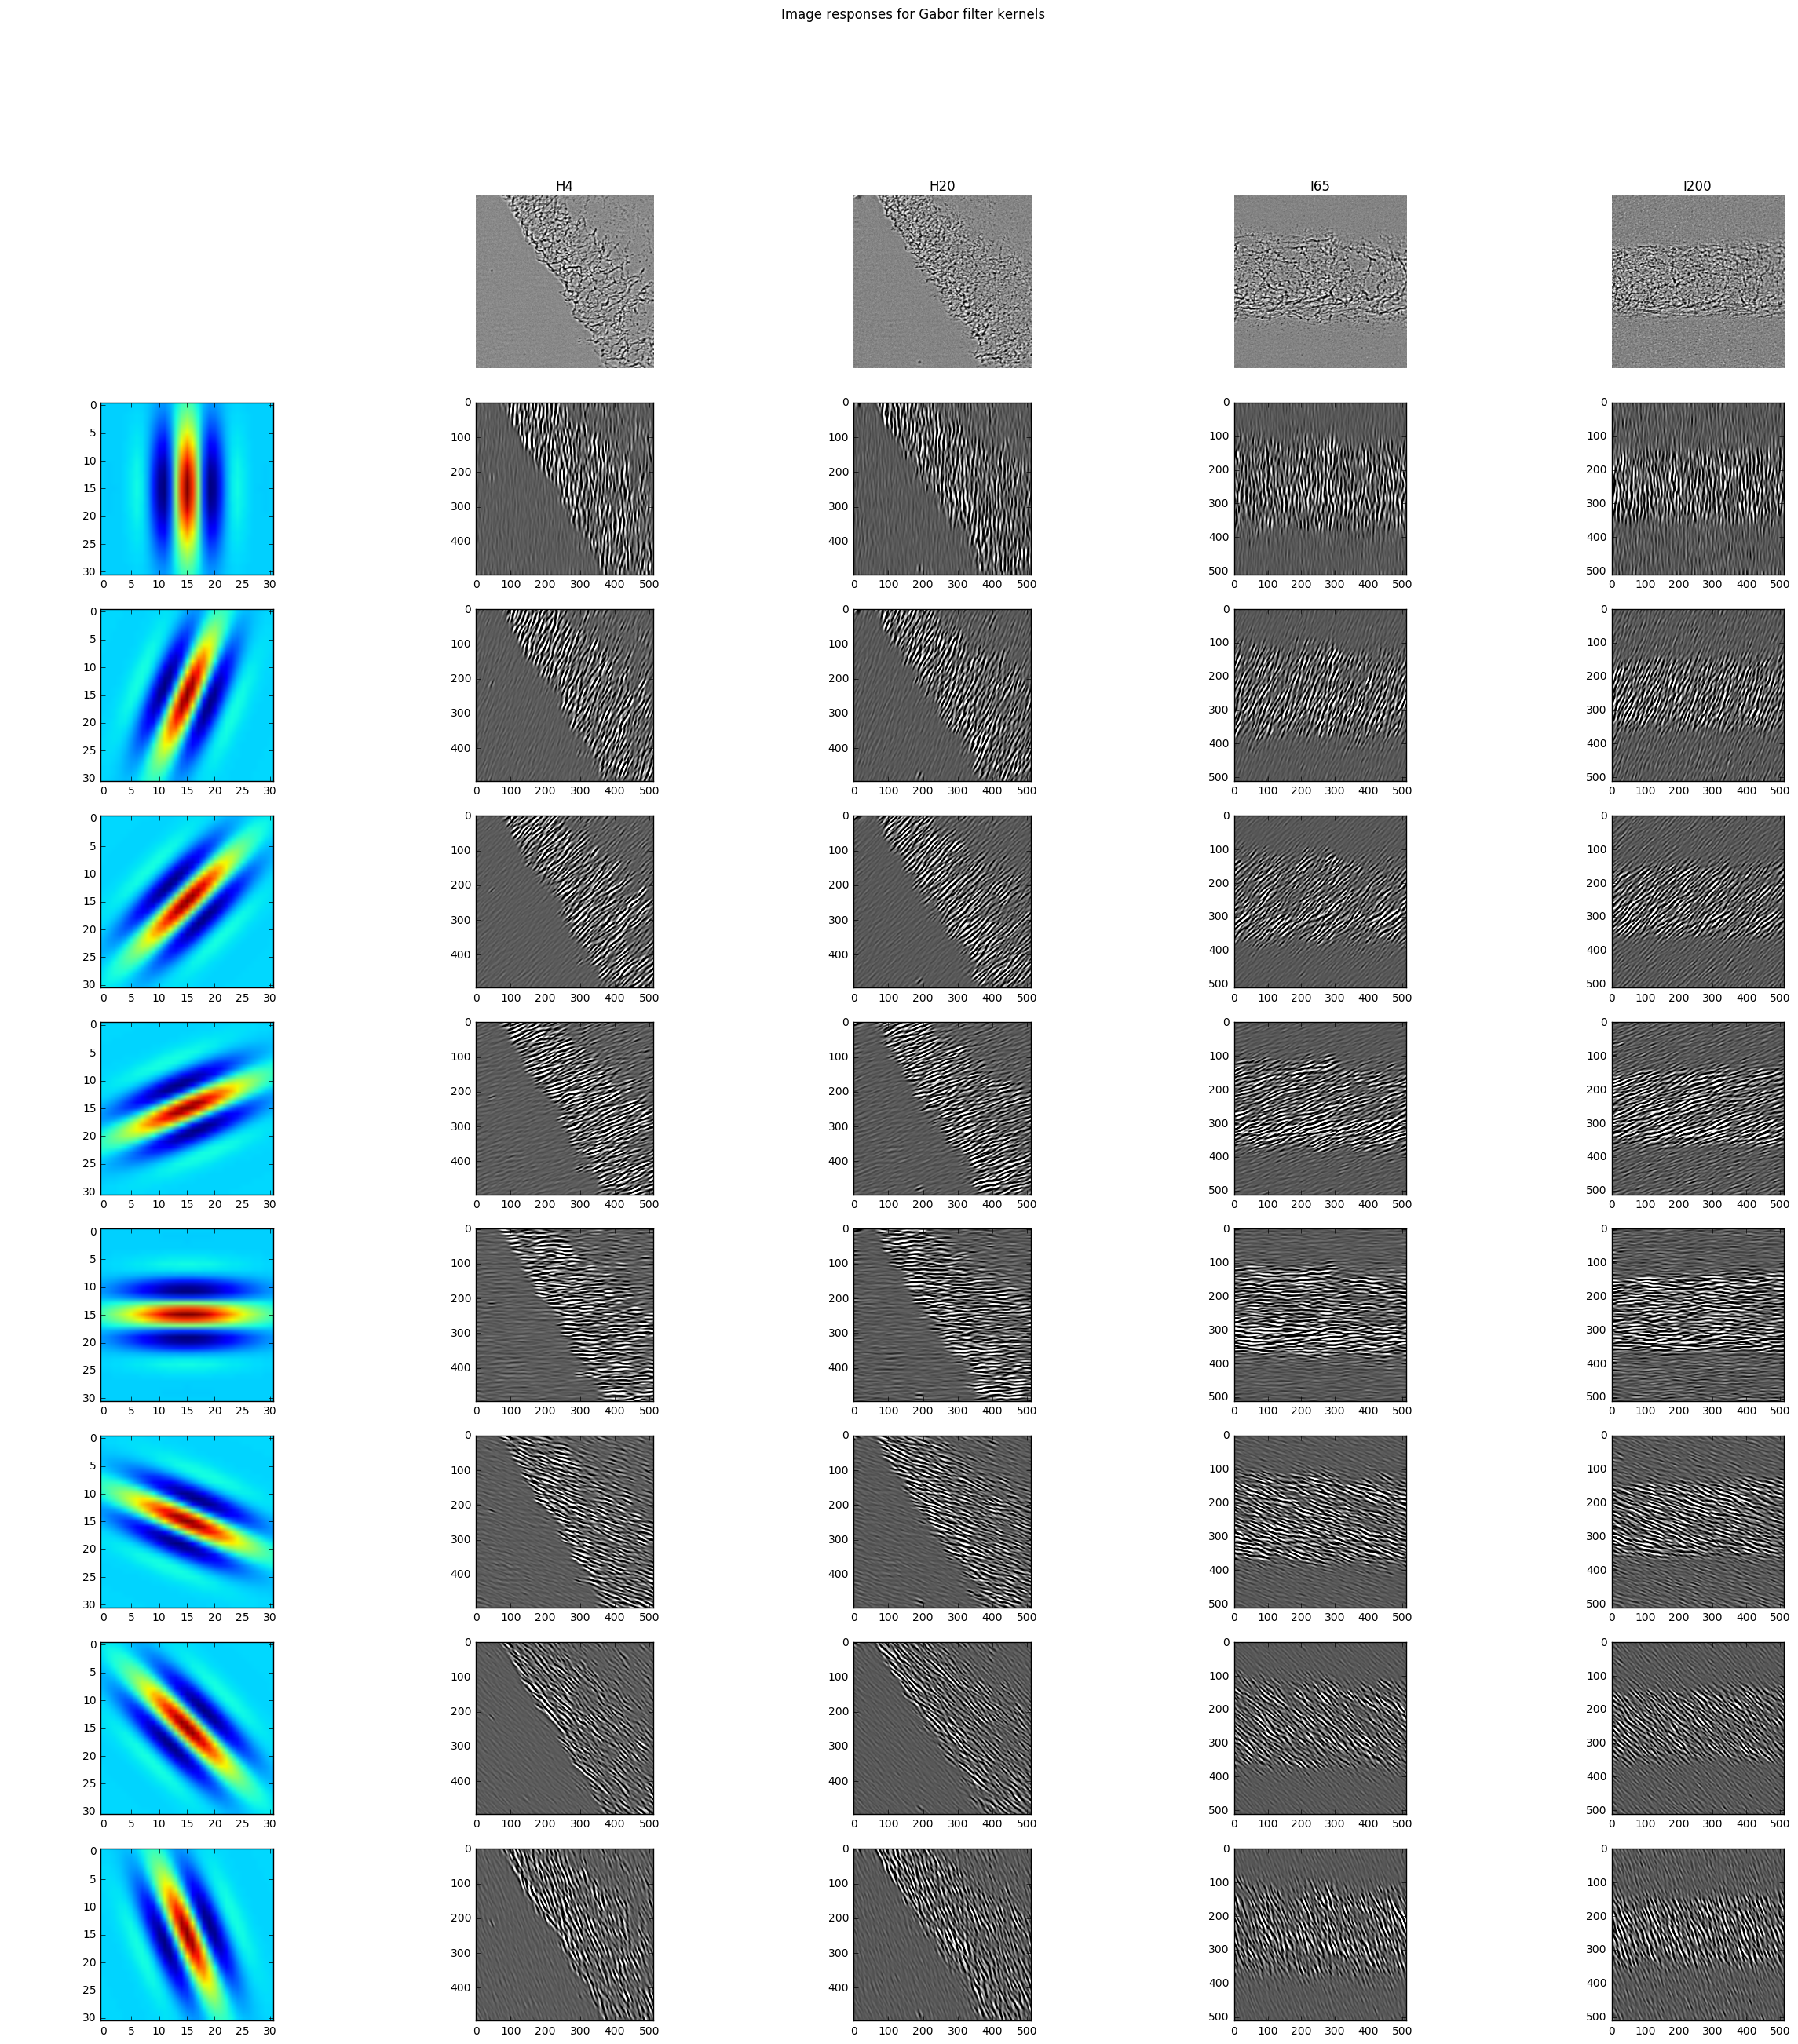

In [166]:
fig, axes = plt.subplots(nrows=len(filters)+1, ncols=5,figsize=(30, 30))

fig.suptitle('Image responses for Gabor filter kernels', fontsize=12)
axes[0][0].axis('off')
#print(axes.shape)
# Plot original images
for label, img, ax in zip(image_names, images, axes[0][1:]):
    #print(type(ax))
    ax.imshow(img)
    ax.set_title(label, fontsize=12)
    ax.axis('off')

#print(type(results))
for i ,f_imgR in enumerate(f_imgs): 
    for j , f_img  in enumerate(f_imgR):
         
        ax = axes[i+1][j]
        #print type(ax)
        #print f_img.shape
        ax.imshow(f_img)
        #print 'done'
    
plt.show()

<type 'numpy.ndarray'>
result type
4


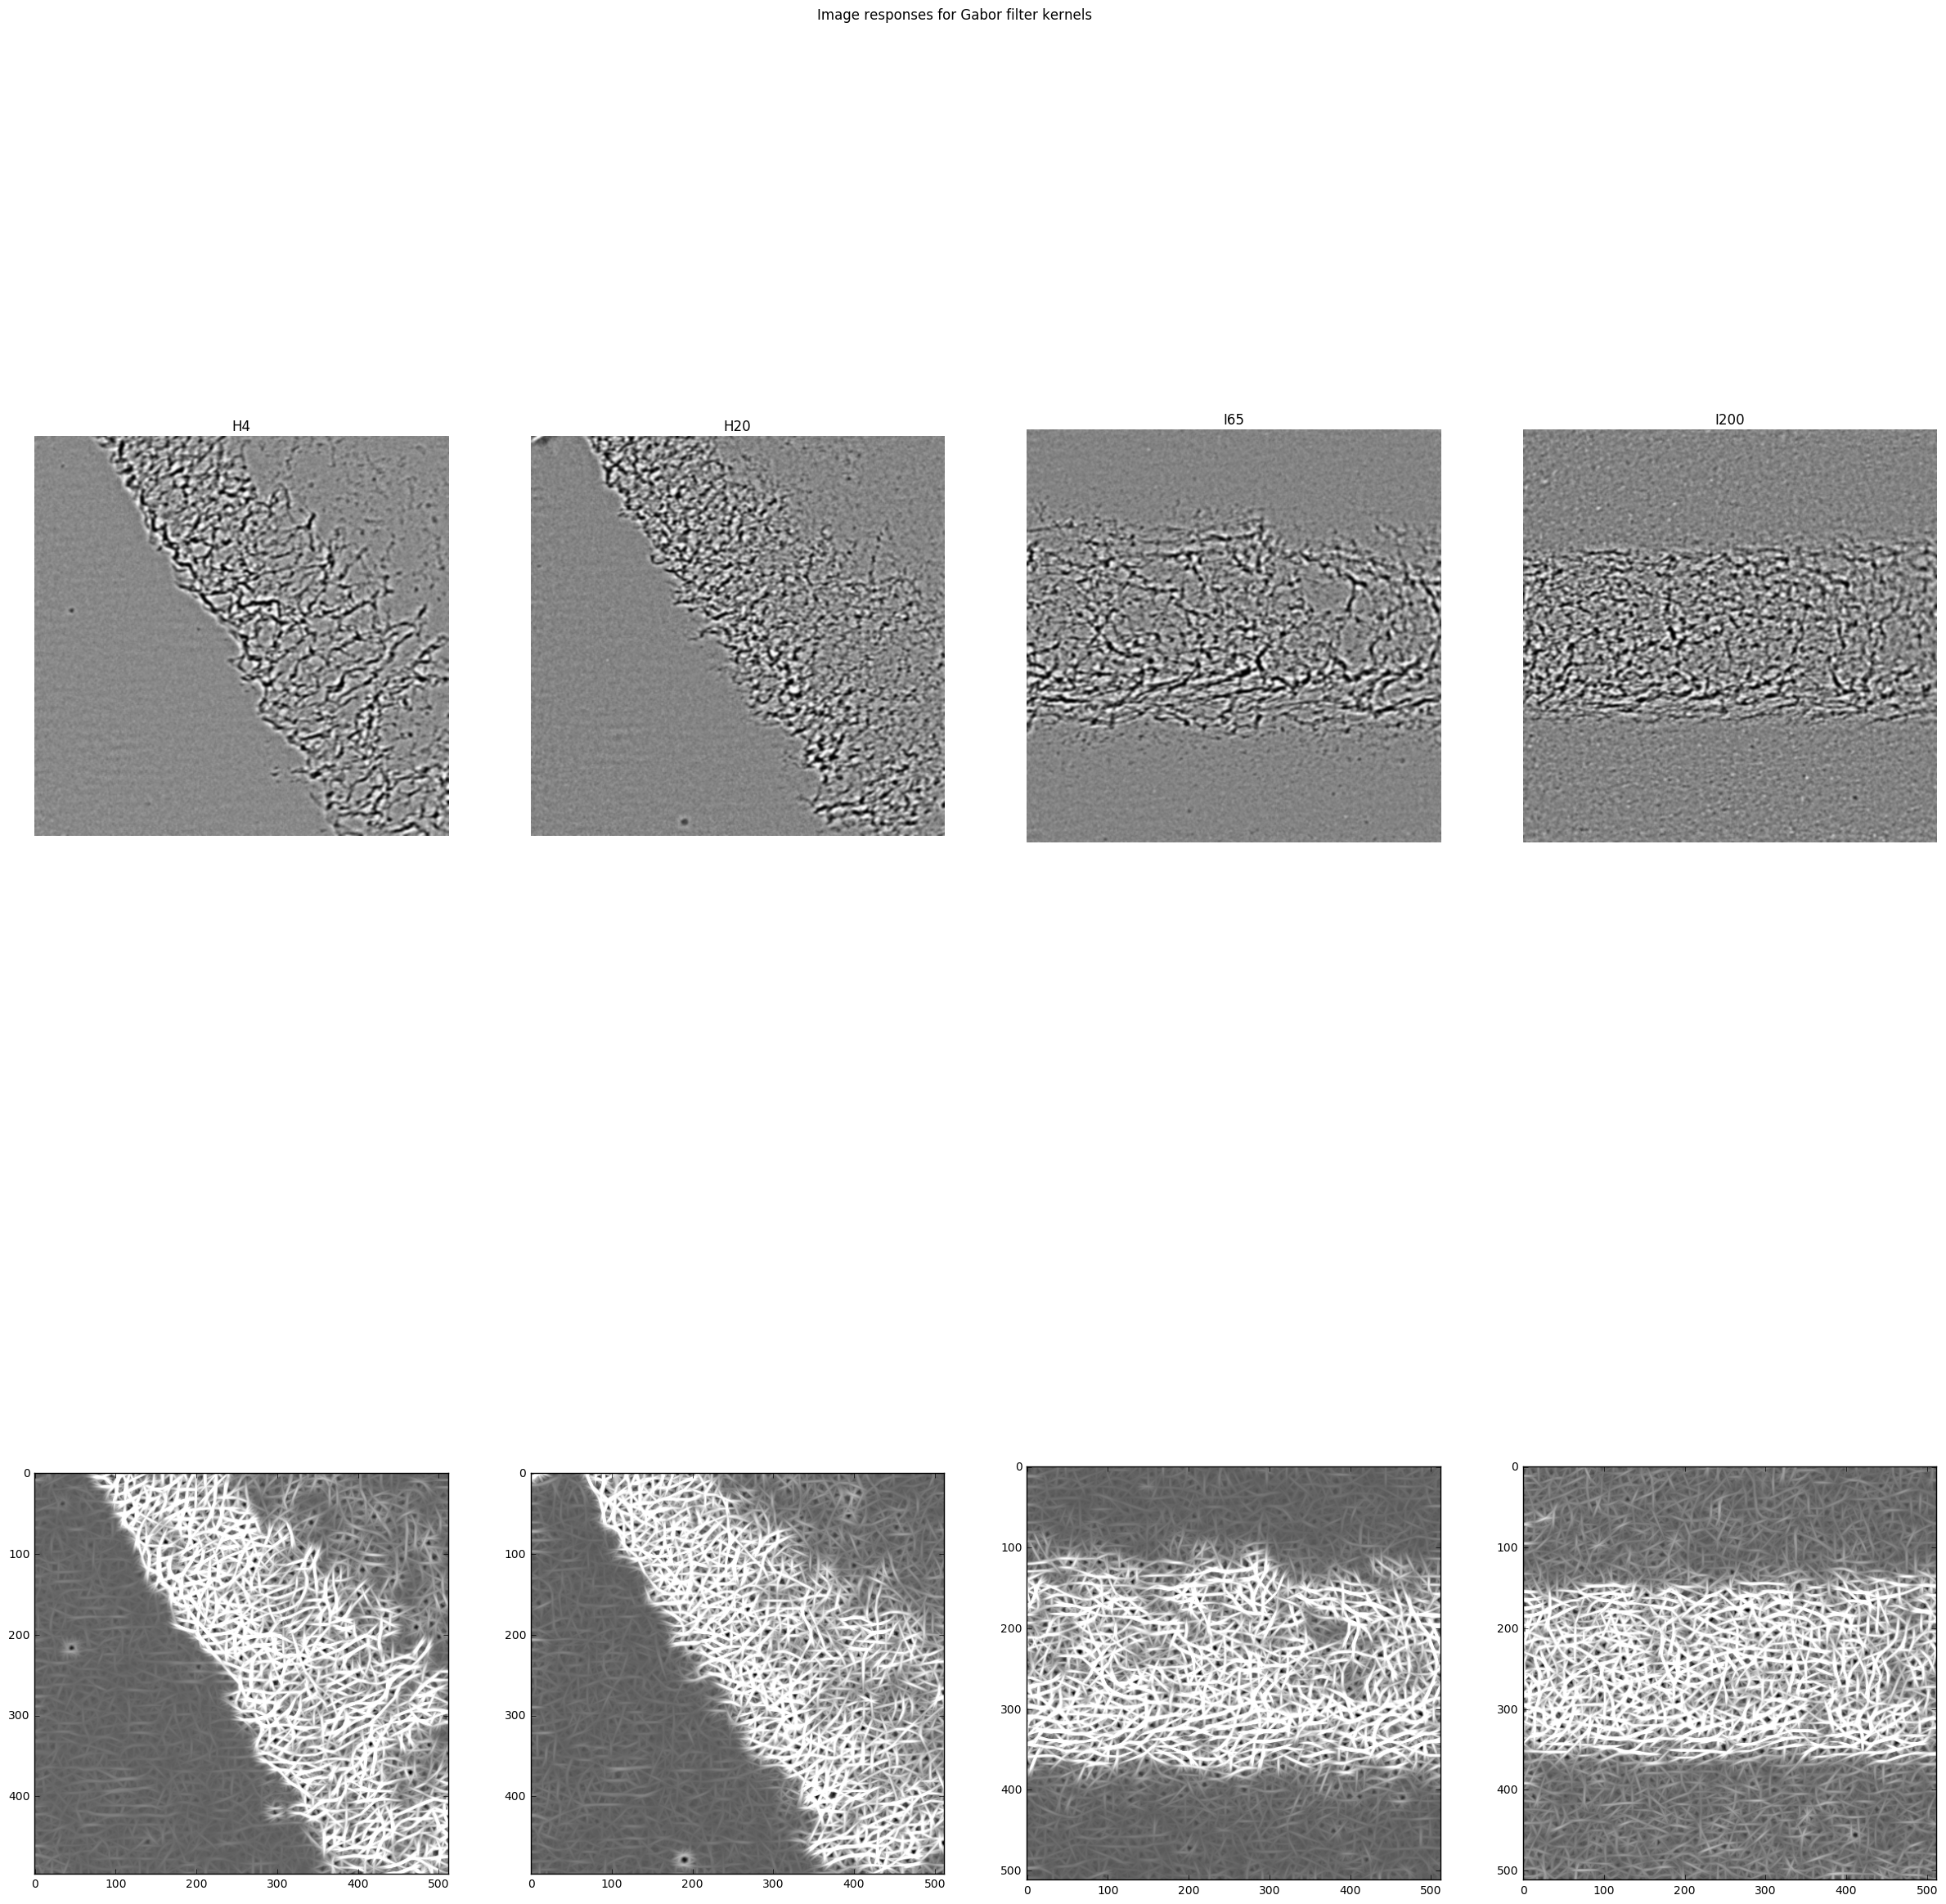

In [184]:
fig, axes = plt.subplots(nrows=2, ncols=4,figsize=(30, 30))

print(type(axes))
fig.suptitle('Image responses for Gabor filter kernels', fontsize=12)
#axes[0][0].axis('off')
#print(axes.shape)
# Plot original images
for label, img, ax in zip(image_names, images, axes[0][0:]):
    #print(type(ax))
    ax.imshow(img)
    ax.set_title(label, fontsize=12)
    ax.axis('off')
print 'result type'
print(len(results))

for  f_img , ax_row in zip( results , axes[1][0:]):
    #print(ax_row)
    ax = ax_row
    ax.imshow(np.real(f_img[0]))
    #ax.set_ylabel(label, fontsize=12)
    #ax.set_xticks([])
    #ax.set_yticks([])
    
# Plot Gabor responses with the contrast normalized for each filter
#for  result , ax_row in zip( results , axes[2][0:]):
#    ax = ax_row
    #print(ax_row)
#    ax.imshow(np.real(result[1]))
    #ax.axis('off')
    
plt.show()

In [231]:
x= np.arange(10)
y = x
b = np.arange(10)
print(x)
print(y)
print(b)
x[0] = 100
#b[0] = 10
print(np.array_equal(y,b))
if np.not_equal(y,b).any():
    print('in')
    b=y
print(x)
print(y)
print(b)

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
False
in
[100   1   2   3   4   5   6   7   8   9]
[100   1   2   3   4   5   6   7   8   9]
[100   1   2   3   4   5   6   7   8   9]


In [28]:
a = np.asarray([10,10,10])
b = np.asarray([20,20,20])
c=5
d = np.maximum(a,b)
print(a)
print(b)
print(c)
print(d)

[10 10 10]
[20 20 20]
5
[20 20 20]


<type 'numpy.ndarray'>
[[0 1]
 [2 3]
 [4 5]]


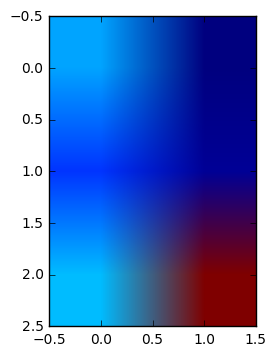

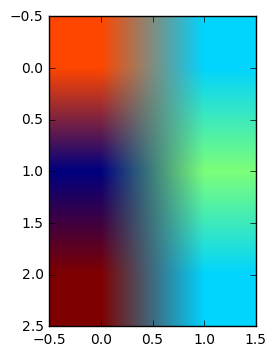

AttributeError: 'list' object has no attribute 'shape'

In [91]:
from numpy import array
x = np.arange(6).reshape(3,2)
print(type(x))
print(x)

y = np.matrix('18 5;13 6; 19 50')
plt.imshow(y)
plt.show()

z = np.matrix('8 5;3 6; 9 5')
plt.imshow(z)
plt.show()

a = [x,y,z]
print(a[0].shape)
b = array(a)
r = b.max(axis=0)
print('np.max',r)
plt.imshow(r)
plt.show()

#print('only max',max(x,y,z))

This is the max and min of the filters
(31, 31)
(<type 'list'>, 'vtype')
(<type 'numpy.ndarray'>, 'f_array type')
(2, 31, 31)


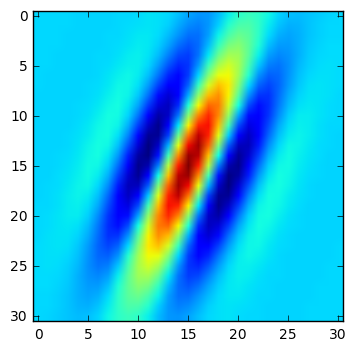

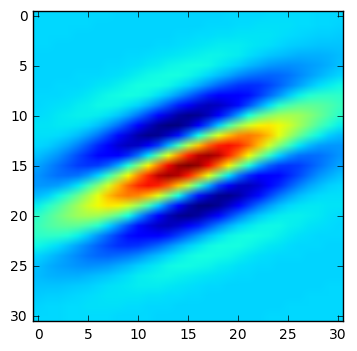

('this is filter 0', -1.2531995e-05)
('this is filter 1', 2.8190794e-07)
('this is fmax', 2.8190794e-07)


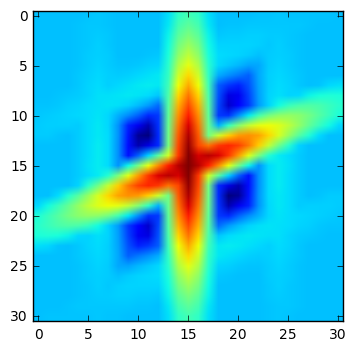

In [93]:
print('This is the max and min of the filters')
print(filters[0].shape)

v = [filters[0], filters[3]]
print(type(v),'vtype')
f_array = array(v)
print(type(f_array),'f_array type')
print(f_array.shape)

#print('this is filter 0',filters[0])
#print('this is filter 1',filters[1])

plt.imshow(filters[1])
plt.show()
plt.imshow(filters[3])
plt.show()
fmax = np.amax(f_array, axis=0)

#np.maximum(filters[0],filters[3]) #f_array.max(axis=0)

print('this is filter 0',filters[0][0][0])
print('this is filter 1',filters[3][0][0])
print('this is fmax',fmax[0][0])

#print(np.equal(fmax,filters[3]))
#fmin = f_array.min(axis=0)
plt.imshow(fmax)
plt.show()
#plt.imshow(fmin)



In [90]:
a = np.arange(4).reshape((2,2))


(2, 2)